In [1]:
import json
import pandas as pd


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Read all dataframes
actual_sequences_df = pd.read_csv('/content/drive/MyDrive/Atul - Optimization and Routing/data/actual_sequences.csv')
invalid_sequence_scores_df = pd.read_csv('/content/drive/MyDrive/Atul - Optimization and Routing/data/invalid_sequence_scores.csv')
package_data_df = pd.read_csv('/content/drive/MyDrive/Atul - Optimization and Routing/data/package_data.csv')
route_data_df = pd.read_csv('/content/drive/MyDrive/Atul - Optimization and Routing/data/route_data.csv')
stop_data_df = pd.read_csv('/content/drive/MyDrive/Atul - Optimization and Routing/data/stop_data.csv')
travel_times = pd.read_csv('/content/drive/MyDrive/Atul - Optimization and Routing/data/travel_times.csv')

In [19]:
actual_sequences_df[actual_sequences_df['Sequence']==0]

,RouteID,StopID,Sequence
103,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,VE,0
200,RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59,UX,0
317,RouteID_001948e9-4675-486d-9ec5-912fd8e0770f,RD,0
421,RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f,LR,0
601,RouteID_0021a2aa-780f-460d-b09a-f301709e2523,SE,0
...,...,...,...
903881,RouteID_ffd16e94-e3db-435f-a128-1ddcb2a34e54,HL,0
904076,RouteID_ffe98097-93df-44b0-9c45-4fedbafae3f3,XN,0
904191,RouteID_ffebb6fc-ce81-46db-b2a1-2750c0333185,OX,0
904327,RouteID_fff2548c-1069-4340-8e50-08420efe435d,SM,0


# Actual Sequences Data EDA

Number of unique routes: 6112

Number of unique stops: 674

Average number of stops per route: 147.77176047120417

Maximum number of stops per route: 237

Minimum number of stops per route: 33



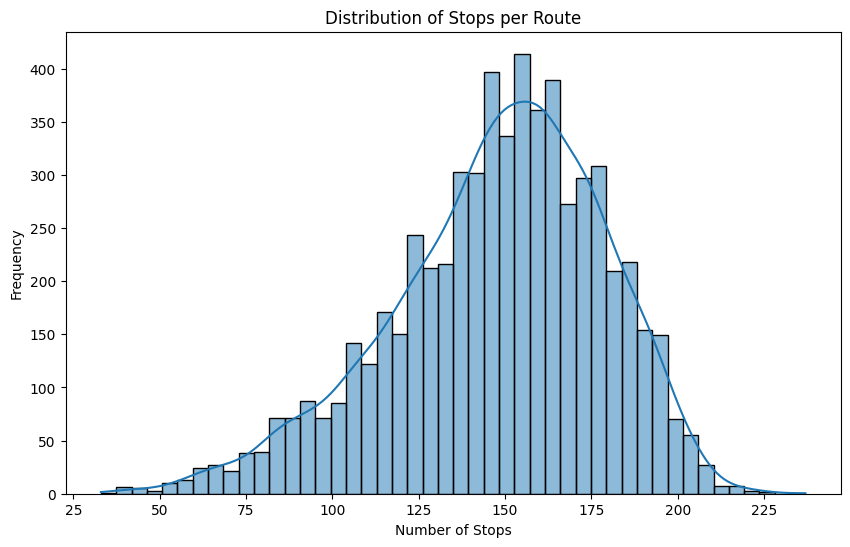

Most popular stop: PT with 1698 mentions

Least popular stop: JC with 986 mentions

Further EDA Suggestions:
- Analyze the sequence of stops within each route.
- Examine the geographic distribution of stops if coordinates are available.
- Assess the time taken between stops if time data is available.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Number of unique routes
unique_routes = actual_sequences_df['RouteID'].nunique()
print(f"Number of unique routes: {unique_routes}\n")

# Number of unique stops
unique_stops = actual_sequences_df['StopID'].nunique()
print(f"Number of unique stops: {unique_stops}\n")

# Stops per route
stops_per_route = actual_sequences_df.groupby('RouteID')['StopID'].count()
average_stops = stops_per_route.mean()
max_stops = stops_per_route.max()
min_stops = stops_per_route.min()
print(f"Average number of stops per route: {average_stops}\n")
print(f"Maximum number of stops per route: {max_stops}\n")
print(f"Minimum number of stops per route: {min_stops}\n")

# Distribution of stops per route
plt.figure(figsize=(10, 6))
sns.histplot(stops_per_route, kde=True)
plt.title('Distribution of Stops per Route')
plt.xlabel('Number of Stops')
plt.ylabel('Frequency')
plt.show()

# Most popular and least popular stops
stop_counts = actual_sequences_df['StopID'].value_counts()
most_popular_stop = stop_counts.idxmax()
least_popular_stop = stop_counts.idxmin()
print(f"Most popular stop: {most_popular_stop} with {stop_counts[0]} mentions\n")
print(f"Least popular stop: {least_popular_stop} with {stop_counts[-1]} mentions\n")

# Further EDA suggestions
print("Further EDA Suggestions:")
print("- Analyze the sequence of stops within each route.")
print("- Examine the geographic distribution of stops if coordinates are available.")
print("- Assess the time taken between stops if time data is available.")


# Package Data EDA

In [40]:
package_data_df = pd.read_csv('/content/drive/MyDrive/Atul - Optimization and Routing/data/package_data.csv')
package_data_df['Volume'] = package_data_df['Depth'] * package_data_df['Height'] * package_data_df['Width']
package_data_df['StartTime'] = pd.to_datetime(package_data_df['StartTime'])
package_data_df['EndTime'] = pd.to_datetime(package_data_df['EndTime'])
# Convert ServiceTime from seconds to hours
package_data_df['ServiceTime'] = package_data_df['ServiceTime'] / 3600

# Convert Volume from cm^3 to m^3
package_data_df['Volume'] = package_data_df['Volume'] / 1e6

In [41]:
package_data_df.head()

,RouteID,StopID,PackageID,ScanStatus,StartTime,EndTime,ServiceTime,Depth,Height,Width,Volume
0,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AD,PackageID_9d7fdd03-f2cf-4c6f-9128-028258fc09ea,DELIVERED,NaT,NaT,0.016472,25.4,7.6,17.8,0.003436
1,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AD,PackageID_5541e679-b7bd-4992-b288-e862f6c84ae7,DELIVERED,2018-07-27 16:00:00,2018-07-28,0.016472,25.4,12.7,17.8,0.005742
2,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AD,PackageID_84d0295b-1adb-4a33-a65e-f7d6247c7a07,DELIVERED,NaT,NaT,0.016472,39.4,7.6,31.8,0.009522
3,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AF,PackageID_15c6a204-ec5f-4ced-9c3d-472316cc7759,DELIVERED,2018-07-27 16:00:00,2018-07-28,0.007500,30.0,3.0,27.4,0.002466
4,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AG,PackageID_3b28f781-242e-416e-9575-84c7188b8208,DELIVERED,NaT,NaT,0.012500,25.4,12.7,17.8,0.005742


Total number of packages delivered: 1446129

ScanStatus
DELIVERED             1446129
DELIVERY_ATTEMPTED      11014
REJECTED                   32
Name: count, dtype: int64 

Average number of packages per stop: 2158.704747774481

Maximum number of packages per stop: 2789 at stop PT

Minimum number of packages per stop: 1567 at stop JC

Average number of packages per route: 238.41214005235602

Maximum number of packages per route: 304

Minimum number of packages per route: 150



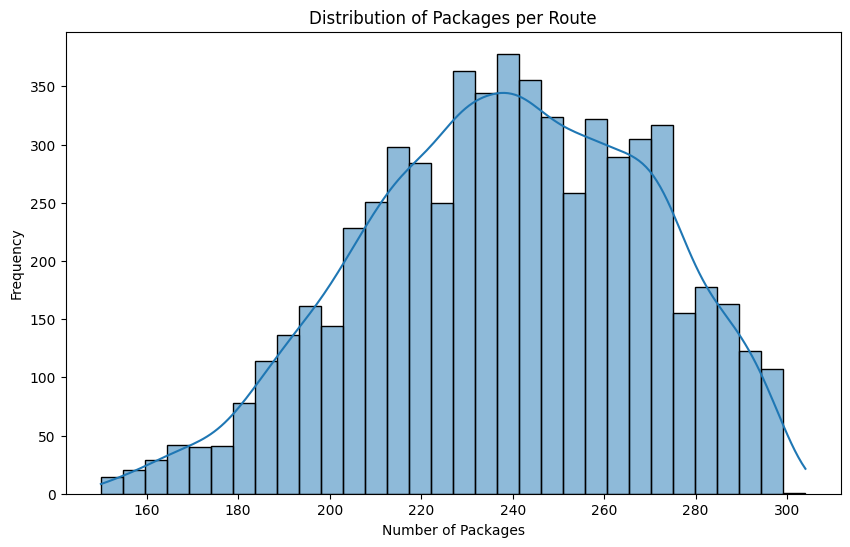

Average total service time per route: 4.519273014834206 hours

Maximum total service time per route: 8.385277777777778 hours on route RouteID_a99c1bfb-d13d-4173-9e0a-959d727f37ce

Minimum total service time per route: 2.126138888888889 hours on route RouteID_d4f29f26-b6a8-4d59-8bd7-3381a44fb7e7



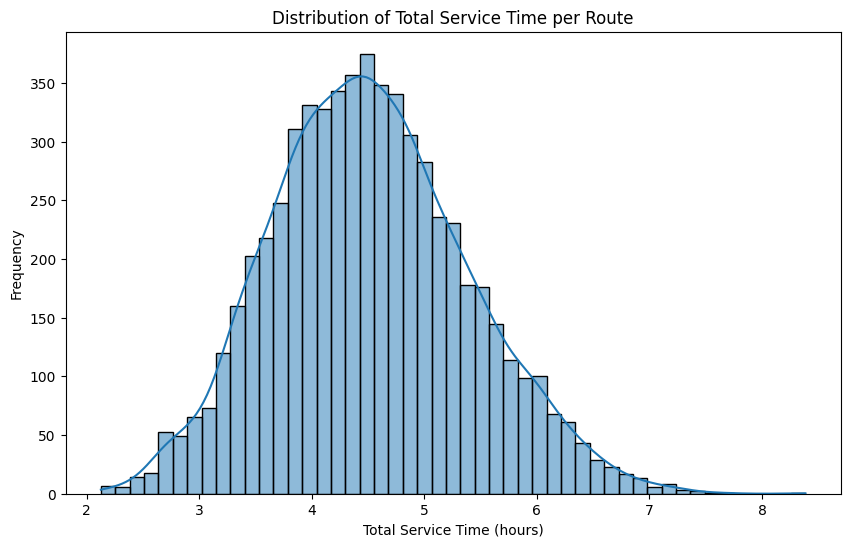

Average time taken per stop (in seconds): 68.24058057542845

Highest time taken per stop (in seconds): 8007.0

Lowest time taken per stop (in seconds): 0.7

Average volume delivered per route: 2.641162733963067 m^3

Maximum volume delivered per route: 4.427701529 m^3

Minimum volume delivered per route: 1.242909088 m^3



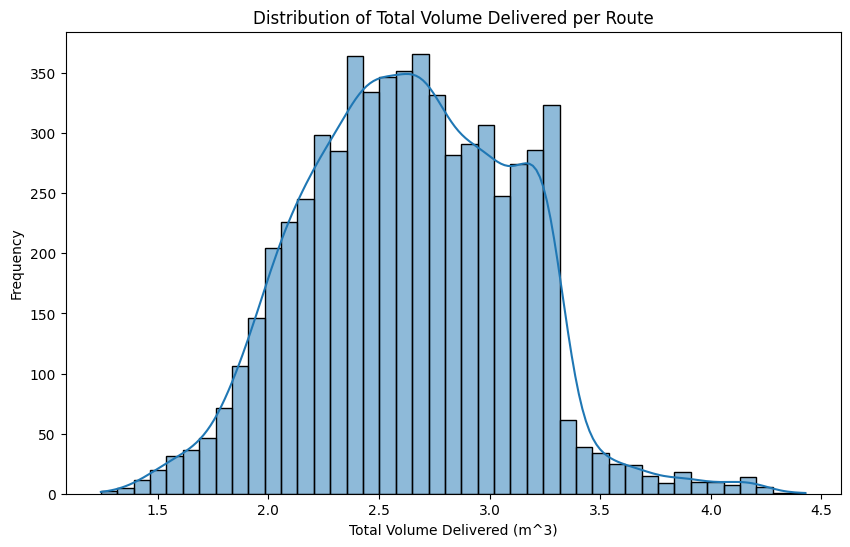

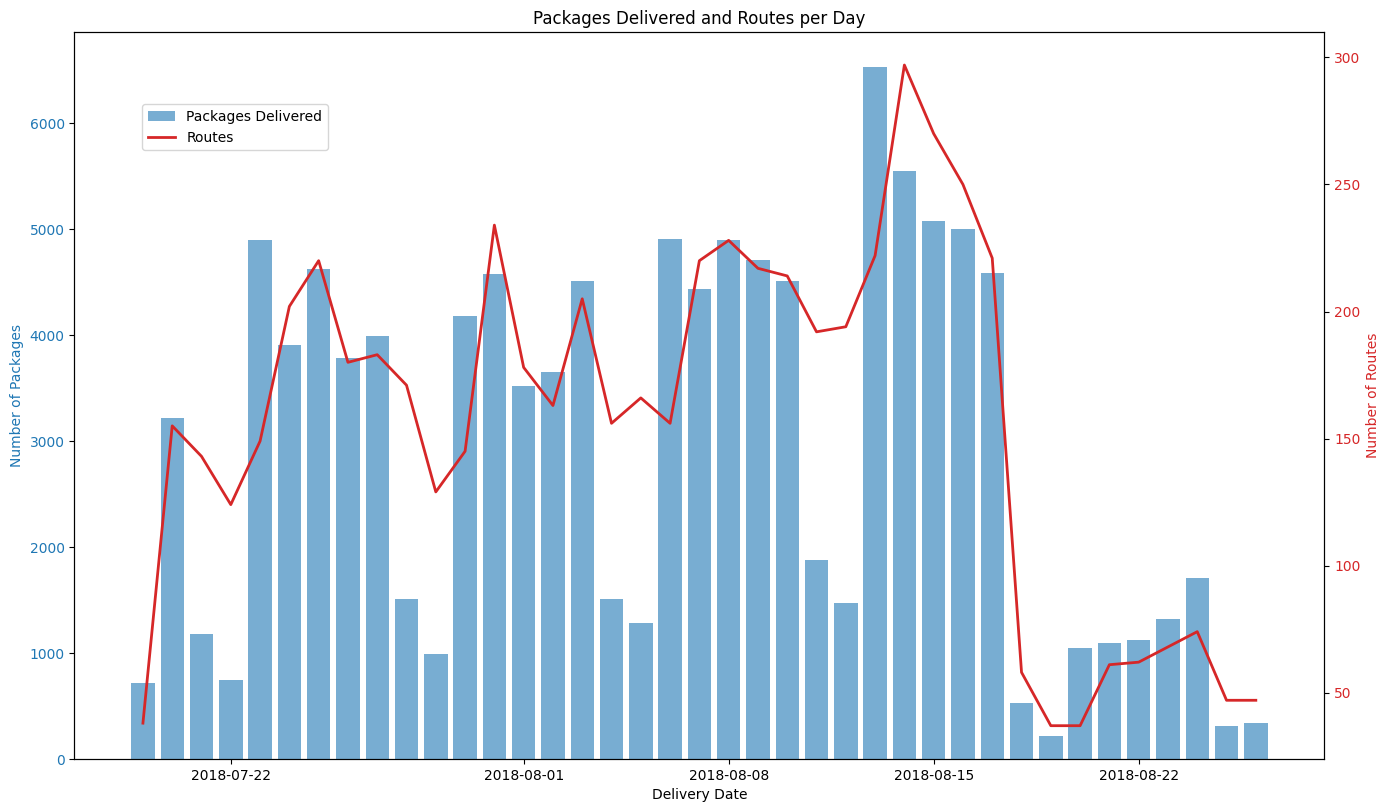

Total packages with delivery attempted once: 10785

Total packages with delivery attempted twice: 113

Total packages with delivery attempted thrice: 1

Further EDA Suggestions:

- Analyze the sequence of stops within each route.

- Examine the geographic distribution of stops if coordinates are available.

- Assess the time taken between stops if time data is available.



In [6]:
# Total number of packages delivered
print(f"Total number of packages delivered: {package_data_df[package_data_df['ScanStatus']=='DELIVERED'].shape[0]}\n")

# Distribution of ScanStatus
scan_status_counts = package_data_df['ScanStatus'].value_counts()
print(scan_status_counts, "\n")

# Packages per stop
packages_per_stop = package_data_df.groupby('StopID')['PackageID'].count()
average_packages_per_stop = packages_per_stop.mean()
max_packages_per_stop = packages_per_stop.max()
min_packages_per_stop = packages_per_stop.min()
max_stop = packages_per_stop.idxmax()
min_stop = packages_per_stop.idxmin()
print(f"Average number of packages per stop: {average_packages_per_stop}\n")
print(f"Maximum number of packages per stop: {max_packages_per_stop} at stop {max_stop}\n")
print(f"Minimum number of packages per stop: {min_packages_per_stop} at stop {min_stop}\n")

# Packages per route
packages_per_route = package_data_df.groupby('RouteID')['PackageID'].count()
average_packages_per_route = packages_per_route.mean()
max_packages_per_route = packages_per_route.max()
min_packages_per_route = packages_per_route.min()
print(f"Average number of packages per route: {average_packages_per_route}\n")
print(f"Maximum number of packages per route: {max_packages_per_route}\n")
print(f"Minimum number of packages per route: {min_packages_per_route}\n")

# Distribution of routes vs packages
plt.figure(figsize=(10, 6))
sns.histplot(packages_per_route, kde=True)
plt.title('Distribution of Packages per Route')
plt.xlabel('Number of Packages')
plt.ylabel('Frequency')
plt.show()

# Total service time per route
total_service_time_per_route = package_data_df.groupby('RouteID')['ServiceTime'].sum()
average_service_time_per_route = total_service_time_per_route.mean()
max_service_time_per_route = total_service_time_per_route.max()
min_service_time_per_route = total_service_time_per_route.min()
longest_route = total_service_time_per_route.idxmax()
shortest_route = total_service_time_per_route.idxmin()
print(f"Average total service time per route: {average_service_time_per_route} hours\n")
print(f"Maximum total service time per route: {max_service_time_per_route} hours on route {longest_route}\n")
print(f"Minimum total service time per route: {min_service_time_per_route} hours on route {shortest_route}\n")

# Distribution of total service time per route
plt.figure(figsize=(10, 6))
sns.histplot(total_service_time_per_route, kde=True)
plt.title('Distribution of Total Service Time per Route')
plt.xlabel('Total Service Time (hours)')
plt.ylabel('Frequency')
plt.show()

# Average time taken per stop in seconds (overall)
average_time_per_stop = package_data_df['ServiceTime'].mean() * 3600
max_time_per_stop = package_data_df['ServiceTime'].max() * 3600
min_time_per_stop = package_data_df['ServiceTime'].min() * 3600
print(f"Average time taken per stop (in seconds): {average_time_per_stop}\n")
print(f"Highest time taken per stop (in seconds): {max_time_per_stop}\n")
print(f"Lowest time taken per stop (in seconds): {min_time_per_stop}\n")

# Volume Analysis
volume_per_route = package_data_df.groupby('RouteID')['Volume'].sum()
average_volume_per_route = volume_per_route.mean()
max_volume_per_route = volume_per_route.max()
min_volume_per_route = volume_per_route.min()
print(f"Average volume delivered per route: {average_volume_per_route} m^3\n")
print(f"Maximum volume delivered per route: {max_volume_per_route} m^3\n")
print(f"Minimum volume delivered per route: {min_volume_per_route} m^3\n")

# Distribution of total volume delivered per route
plt.figure(figsize=(10, 6))
sns.histplot(volume_per_route, kde=True)
plt.title('Distribution of Total Volume Delivered per Route')
plt.xlabel('Total Volume Delivered (m^3)')
plt.ylabel('Frequency')
plt.show()

# Temporal Analysis: Number of packages delivered per day and number of routes per day
package_data_df['DeliveryDate'] = package_data_df['StartTime'].dt.date
packages_per_day = package_data_df.groupby('DeliveryDate')['PackageID'].count()
routes_per_day = package_data_df.groupby('DeliveryDate')['RouteID'].nunique()

# Separate plots for number of packages delivered and number of routes per day
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Delivery Date')
ax1.set_ylabel('Number of Packages', color=color)
ax1.bar(packages_per_day.index, packages_per_day.values, color=color, alpha=0.6, label='Packages Delivered')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of Routes', color=color)
ax2.plot(routes_per_day.index, routes_per_day.values, color=color, label='Routes', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Packages Delivered and Routes per Day')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()

package_attempt_counts = package_data_df[package_data_df['ScanStatus'] == 'DELIVERY_ATTEMPTED'].groupby('PackageID').size()
multiple_attempts1 = package_attempt_counts[package_attempt_counts == 1]
multiple_attempts2 = package_attempt_counts[package_attempt_counts == 2]
multiple_attempts3 = package_attempt_counts[package_attempt_counts == 3]

print(f"Total packages with delivery attempted once: {multiple_attempts1.shape[0]}\n")
print(f"Total packages with delivery attempted twice: {multiple_attempts2.shape[0]}\n")
print(f"Total packages with delivery attempted thrice: {multiple_attempts3.shape[0]}\n")

# Further EDA suggestions
print("Further EDA Suggestions:\n")
print("- Analyze the sequence of stops within each route.\n")
print("- Examine the geographic distribution of stops if coordinates are available.\n")
print("- Assess the time taken between stops if time data is available.\n")


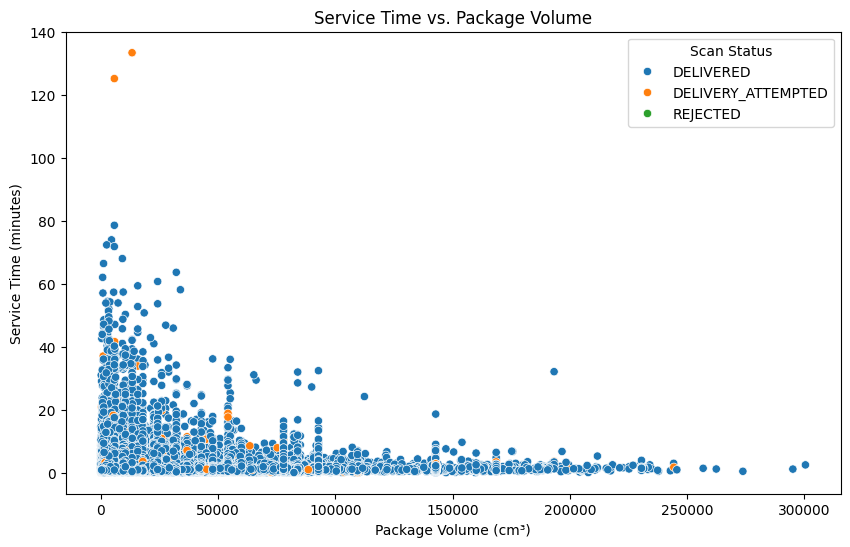

In [42]:
package_data_df['ServiceTime'] = package_data_df['ServiceTime'] * 60  # Convert to minutes
package_data_df['Volume'] = package_data_df['Volume'] * 1e6  # Convert to cm3


# Scatter Plot: Service Time vs. Package Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=package_data_df['Volume'], y=package_data_df['ServiceTime'], hue=package_data_df['ScanStatus'])
plt.title('Service Time vs. Package Volume')
plt.xlabel('Package Volume (cm³)')
plt.ylabel('Service Time (minutes)')
plt.legend(title='Scan Status')
plt.show()


# Route Data

In [7]:
route_data_df['Capacity'] = route_data_df['Capacity']/ 1e6


Number of unique StationCodes: 17

Top 5 Stations:
 StationCode
DLA7    1133
DLA9     701
DBO3     573
DSE5     508
DLA8     448
Name: count, dtype: int64 

RouteScore Value Counts (High, Medium, Low):
 RouteScore
High      2718
Medium    3292
Low        102
Name: count, dtype: int64 

Most recent date: 2018-07-19 00:00:00
Latest date: 2018-08-26 00:00:00



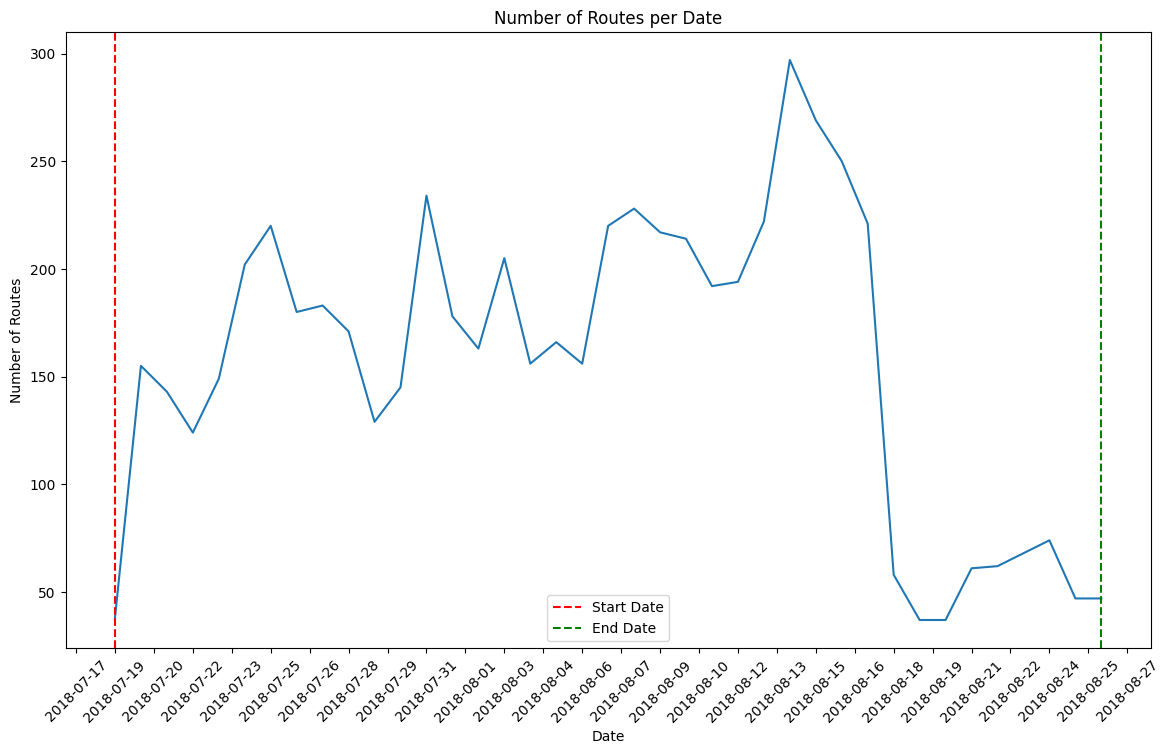

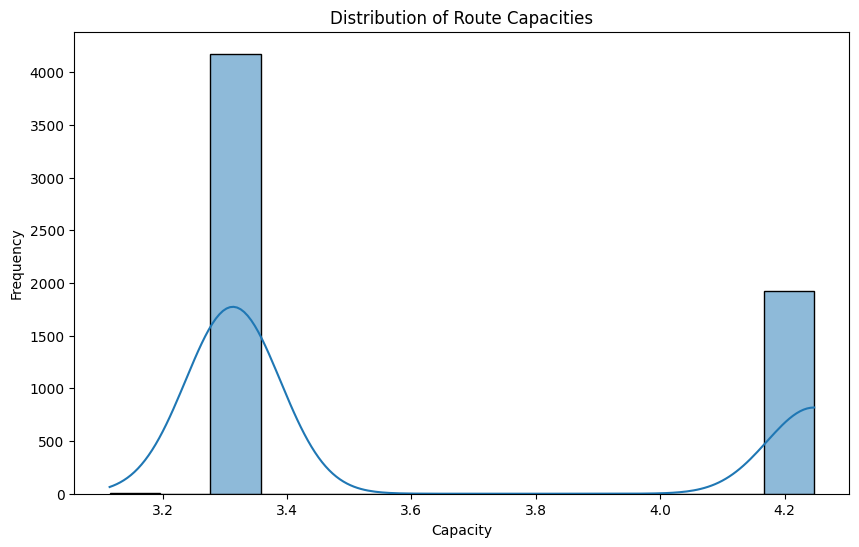

<ipython-input-8-f1349344d61c>:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  route_data_df['DepartureTime'] = pd.to_datetime(route_data_df['DepartureTime'])


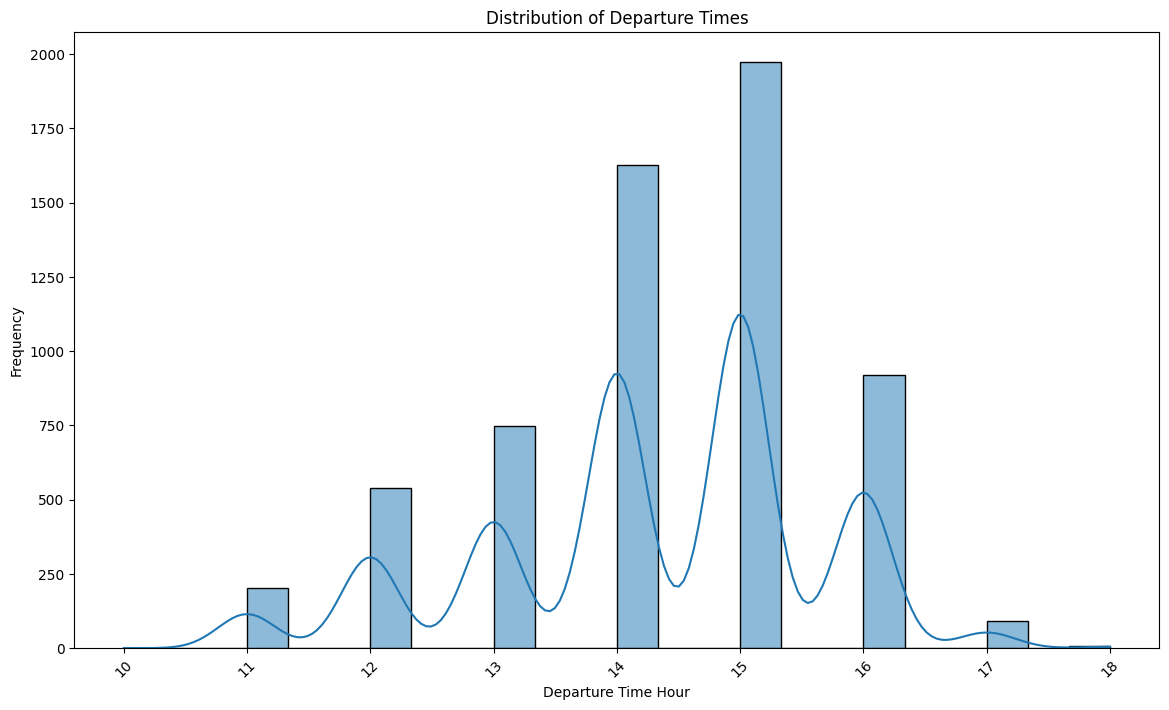

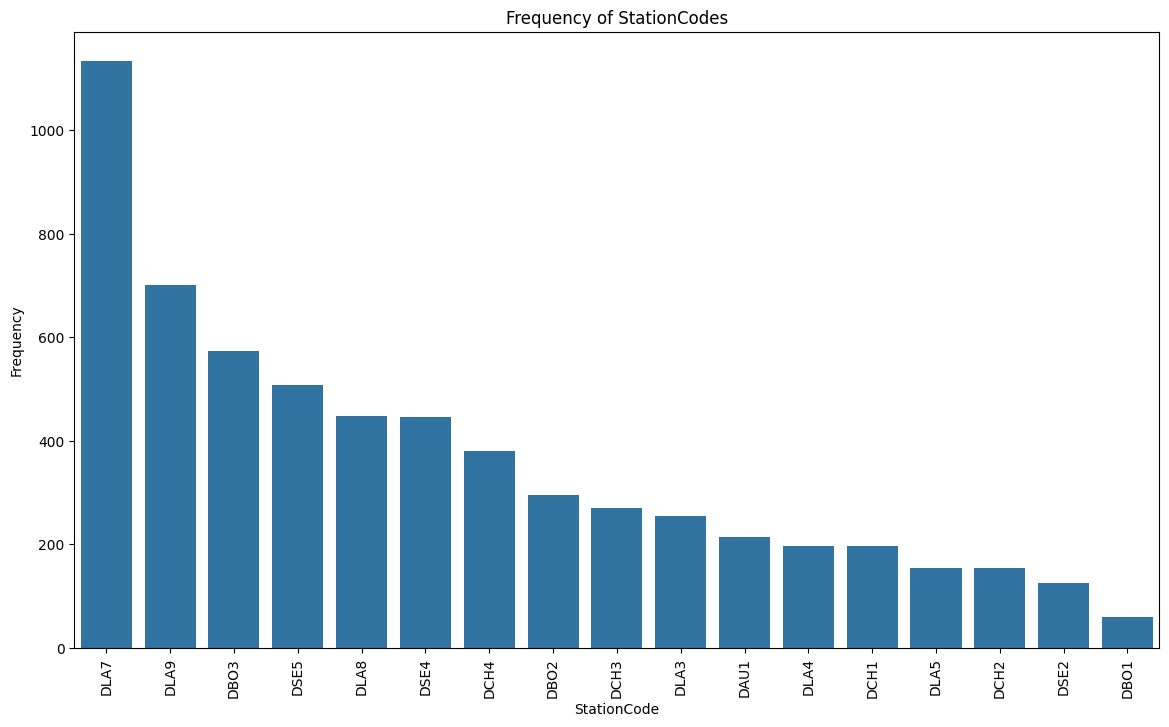

In [8]:
route_data_df['Date'] = pd.to_datetime(route_data_df['Date'])

# Count of Unique StationCodes
unique_stations = route_data_df['StationCode'].nunique()
print(f"Number of unique StationCodes: {unique_stations}\n")

# Top 5 Stations
top_stations = route_data_df['StationCode'].value_counts().head(5)
print("Top 5 Stations:\n", top_stations, "\n")

# RouteScore Value Counts
route_score_counts = route_data_df['RouteScore'].value_counts().reindex(['High', 'Medium', 'Low'], fill_value=0)
print("RouteScore Value Counts (High, Medium, Low):\n", route_score_counts, "\n")

# Most Recent and Latest Dates
most_recent_date = route_data_df['Date'].min()
latest_date = route_data_df['Date'].max()
print(f"Most recent date: {most_recent_date}")
print(f"Latest date: {latest_date}\n")

# Date vs Routes Graph
routes_per_date = route_data_df['Date'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x=routes_per_date.index, y=routes_per_date.values)
plt.axvline(routes_per_date.index.min(), color='red', linestyle='--', label='Start Date')
plt.axvline(routes_per_date.index.max(), color='green', linestyle='--', label='End Date')
plt.xticks(rotation=45)
plt.title('Number of Routes per Date')
plt.xlabel('Date')
plt.ylabel('Number of Routes')
plt.legend()

# Ensure all dates are visible
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=len(routes_per_date)))
plt.show()

# Route Capacity Analysis
plt.figure(figsize=(10, 6))
sns.histplot(route_data_df['Capacity'], kde=True)
plt.title('Distribution of Route Capacities')
plt.xlabel('Capacity')
plt.ylabel('Frequency')
plt.show()

# Departure Time Analysis
route_data_df['DepartureTime'] = pd.to_datetime(route_data_df['DepartureTime'])
departure_times = route_data_df['DepartureTime'].dt.time.value_counts().sort_index()

plt.figure(figsize=(14, 8))
sns.histplot(route_data_df['DepartureTime'].dt.hour, bins=24, kde=True)
plt.title('Distribution of Departure Times')
plt.xlabel('Departure Time Hour')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# StationCode Frequency
station_frequency = route_data_df['StationCode'].value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(x=station_frequency.index, y=station_frequency.values)
plt.title('Frequency of StationCodes')
plt.xlabel('StationCode')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Stop data EDA

In [16]:
stop_data_df.shape

(904527, 6)

In [28]:
# Most Popular ZoneIDs
most_popular_zones = stop_data_df['ZoneID'].value_counts().head(10)
print("Most Popular ZoneIDs:\n", most_popular_zones, "\n")

# Number of Unique ZoneIDs
unique_zones = stop_data_df['ZoneID'].nunique()
print(f"Number of unique ZoneIDs: {unique_zones}\n")

# Number of NaN's in ZoneID Column
nan_zoneid_count = stop_data_df['ZoneID'].isna().sum()

print(f"Number of stops with NaN in ZoneID: {nan_zoneid_count}\n")

print(f"% NaN in ZoneID column: {((nan_zoneid_count/stop_data_df.shape[0])*100).round(2)} % \n")


# Average Number of Stops per Zone
stops_per_zone = stop_data_df.groupby('ZoneID').size().reset_index(name='Stops')
average_stops_per_zone = stops_per_zone['Stops'].mean()
print(f"Average number of stops per Zone: {average_stops_per_zone}\n")

# Stop Type Analysis
stop_type_counts = stop_data_df['Type'].value_counts()
print("Stop Type Counts:\n", stop_type_counts, "\n")


# # Geospatial Distribution
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=stop_data_df['Longitude'], y=stop_data_df['Latitude'], hue=stop_data_df['Type'])
# plt.title('Geospatial Distribution of Stops')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.legend(title='Stop Type')
# plt.show()



Most Popular ZoneIDs:
 ZoneID
D-10.1A    564
D-10.2A    523
D-5.1D     516
D-5.2E     504
D-5.1E     501
B-6.2C     488
C-9.1D     483
D-3.2D     482
D-10.3C    481
D-10.1C    470
Name: count, dtype: int64 

Number of unique ZoneIDs: 8962

Number of stops with NaN in ZoneID: 12627

% NaN in ZoneID column: 1.4 % 

Average number of stops per Zone: 99.52019638473556

Stop Type Counts:
 Type
Dropoff    898415
Station      6112
Name: count, dtype: int64 



In [10]:
package_data_df.head(30)

,RouteID,StopID,PackageID,ScanStatus,StartTime,EndTime,ServiceTime,Depth,Height,Width
0,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AD,PackageID_9d7fdd03-f2cf-4c6f-9128-028258fc09ea,DELIVERED,NaN,NaN,59.3,25.4,7.6,17.8
1,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AD,PackageID_5541e679-b7bd-4992-b288-e862f6c84ae7,DELIVERED,2018-07-27 16:00:00,2018-07-28 00:00:00,59.3,25.4,12.7,17.8
2,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AD,PackageID_84d0295b-1adb-4a33-a65e-f7d6247c7a07,DELIVERED,NaN,NaN,59.3,39.4,7.6,31.8
3,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AF,PackageID_15c6a204-ec5f-4ced-9c3d-472316cc7759,DELIVERED,2018-07-27 16:00:00,2018-07-28 00:00:00,27.0,30.0,3.0,27.4
4,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AG,PackageID_3b28f781-242e-416e-9575-84c7188b8208,DELIVERED,NaN,NaN,45.0,25.4,12.7,17.8
5,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AG,PackageID_c58c3b4e-2fc7-4222-b712-e5067906736b,DELIVERED,NaN,NaN,45.0,49.5,7.6,35.6
6,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,BA,PackageID_a18e36e0-6b5a-45b7-bf7a-7c3a15bd5a5d,DELIVERED,NaN,NaN,38.0,24.4,1.0,16.8
7,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,BE,PackageID_22c8f630-8ab9-40d5-a36d-38ef01761b00,DELIVERED,NaN,NaN,41.8,34.8,0.8,22.1
8,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,BE,PackageID_68c4cbf6-d23f-4675-a927-159ff3765efb,DELIVERED,NaN,NaN,41.8,29.0,6.6,16.3
9,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,BE,PackageID_0d659fdd-4dbc-4f95-af88-5858048ca94f,DELIVERED,NaN,NaN,41.8,45.7,21.6,22.9


In [11]:
route_data_df

,RouteID,StationCode,Date,DepartureTime,Capacity,RouteScore
0,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High
1,RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59,DSE4,2018-07-28,15:44:41,4247527.0,High
2,RouteID_001948e9-4675-486d-9ec5-912fd8e0770f,DSE5,2018-08-18,15:32:04,4247527.0,High
3,RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f,DLA9,2018-08-15,15:09:38,3313071.0,High
4,RouteID_0021a2aa-780f-460d-b09a-f301709e2523,DLA7,2018-08-05,14:23:26,3313071.0,High
...,...,...,...,...,...,...
6107,RouteID_ffd16e94-e3db-435f-a128-1ddcb2a34e54,DAU1,2018-07-24,13:47:59,4247527.0,Medium
6108,RouteID_ffe98097-93df-44b0-9c45-4fedbafae3f3,DCH4,2018-08-10,14:07:25,3313071.0,Medium
6109,RouteID_ffebb6fc-ce81-46db-b2a1-2750c0333185,DCH3,2018-07-25,14:10:26,3313071.0,High
6110,RouteID_fff2548c-1069-4340-8e50-08420efe435d,DLA8,2018-07-29,15:13:39,4247527.0,High


In [20]:
stop_data_df[stop_data_df['RouteID'] == 'RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77']

,RouteID,StopID,Latitude,Longitude,Type,ZoneID
0,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AD,34.099611,-118.283062,Dropoff,P-12.3C
1,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AF,34.101587,-118.291125,Dropoff,A-1.2D
2,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AG,34.089727,-118.285530,Dropoff,A-2.1A
3,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,BA,34.096132,-118.292869,Dropoff,A-1.2C
4,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,BE,34.098482,-118.286243,Dropoff,P-13.3B
...,...,...,...,...,...,...
114,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,YY,34.100902,-118.285704,Dropoff,P-13.1B
115,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,ZB,34.098661,-118.285183,Dropoff,P-13.2B
116,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,ZE,34.093294,-118.292799,Dropoff,A-1.1C
117,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,ZP,34.099485,-118.278658,Dropoff,P-12.3D


In [21]:
actual_sequences_df[actual_sequences_df['RouteID'] == 'RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77']

,RouteID,StopID,Sequence
0,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AD,105
1,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AF,47
2,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,AG,4
3,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,BA,33
4,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,BE,109
...,...,...,...
114,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,YY,116
115,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,ZB,112
116,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,ZE,31
117,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,ZP,100
